In [1]:
#Importing the required data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from itertools import chain

sns.set()

In [2]:
#Reading Data File
data = pd.read_csv('findings_data.csv')
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.columns

Index(['Patient ID', 'Finding Labels', 'Patient Age', 'Patient Gender',
       'Mass_Size'],
      dtype='object')

## Dealing With Categorical Data

In [5]:
## Here I'm just going to split up my "Finding Labels" column so that I have one column in my dataframe
# per disease, with a binary flag. This makes EDA a lot easier! 
#Dealing With the Categorical Data

all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print(f'All Labels ({len(all_labels)}): {all_labels}')


All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [6]:
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        data[c_label] = data['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
data.head()

,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,1,Cardiomegaly|Emphysema,57,M,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2,No Finding,77,M,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,Atelectasis,79,M,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Cardiomegaly|Edema|Effusion,55,F,NaN,0,1,0,1,1,0,0,0,0,0,0,0,0,0
4,5,Consolidation|Mass,68,M,2516.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [7]:
len(all_labels)

14

## The number of people with each diseases and the most common disease.

In [8]:
#Counting Labels
data[all_labels].sum().sort_values(ascending = False )

No Finding            575
Infiltration          134
Effusion               95
Atelectasis            93
Consolidation          43
Nodule                 41
Cardiomegaly           38
Mass                   35
Pneumothorax           33
Pleural_Thickening     32
Fibrosis               27
Emphysema              18
Edema                  16
Pneumonia               6
dtype: int64

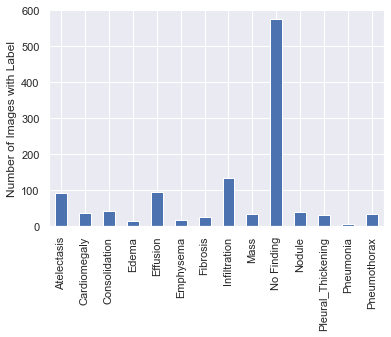

In [9]:
ax = data[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')
plt.show()

In [10]:
# Common disease combination with Infiltration                                               
##Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
#Co-Occurance with (Infiltration)
data[data.Infiltration==1]['Finding Labels'].value_counts()

Infiltration                                               75
Atelectasis|Infiltration                                   11
Effusion|Infiltration                                       6
Cardiomegaly|Infiltration                                   4
Atelectasis|Effusion|Infiltration                           3
Edema|Infiltration                                          3
Infiltration|Nodule                                         3
Fibrosis|Infiltration                                       3
Consolidation|Infiltration                                  2
Effusion|Infiltration|Nodule                                2
Consolidation|Effusion|Infiltration                         2
Infiltration|Pneumothorax                                   1
Consolidation|Effusion|Infiltration|Nodule                  1
Atelectasis|Fibrosis|Infiltration                           1
Atelectasis|Consolidation|Edema|Effusion|Infiltration       1
Effusion|Infiltration|Mass                                  1
Atelecta

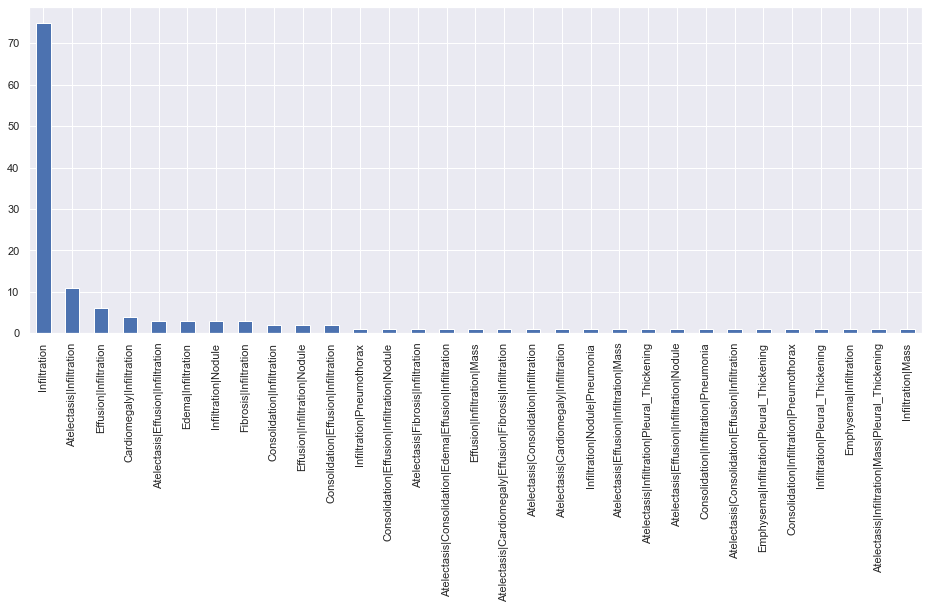

In [11]:
plt.figure(figsize=(16,6))
data[data.Infiltration==1]['Finding Labels'].value_counts().plot(kind="bar")

In [12]:
# Common disease combination with Effusion                                              
data[data.Effusion ==1]['Finding Labels'].value_counts()

Effusion                                                   38
Atelectasis|Effusion                                        9
Cardiomegaly|Effusion                                       7
Effusion|Infiltration                                       6
Atelectasis|Consolidation|Effusion                          5
Atelectasis|Effusion|Infiltration                           3
Consolidation|Effusion                                      2
Effusion|Pleural_Thickening                                 2
Effusion|Infiltration|Nodule                                2
Consolidation|Effusion|Infiltration                         2
Consolidation|Effusion|Mass                                 1
Consolidation|Effusion|Pneumothorax                         1
Atelectasis|Cardiomegaly|Effusion|Fibrosis|Infiltration     1
Effusion|Infiltration|Mass                                  1
Effusion|Nodule                                             1
Effusion|Pleural_Thickening|Pneumothorax                    1
Atelecta

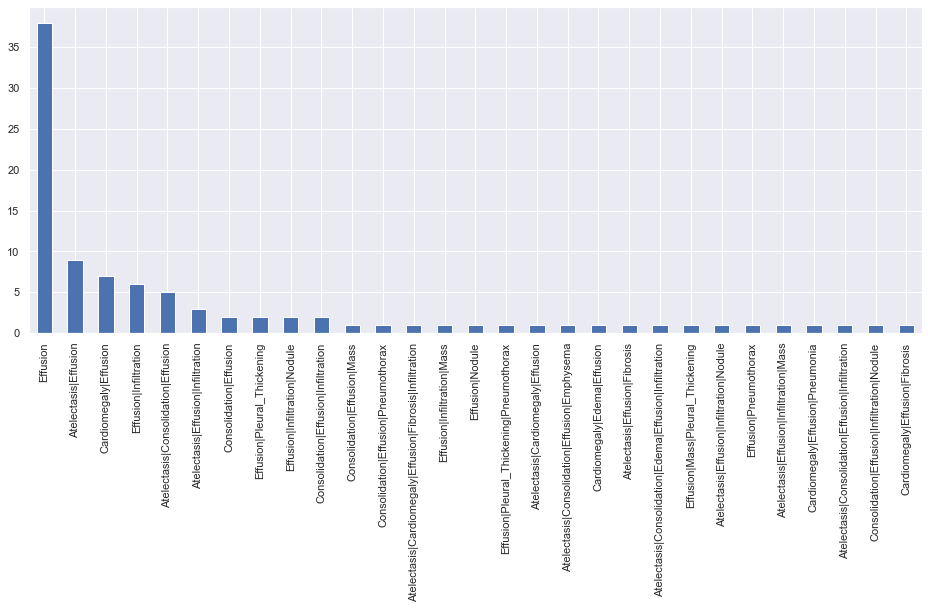

In [13]:
plt.figure(figsize=(16,6))
data[data.Effusion ==1]['Finding Labels'].value_counts().plot(kind ="bar")

In [14]:
# Common disease combination with Atelectasis                                               
data[data.Atelectasis==1]['Finding Labels'].value_counts()

Atelectasis                                                44
Atelectasis|Infiltration                                   11
Atelectasis|Effusion                                        9
Atelectasis|Consolidation|Effusion                          5
Atelectasis|Effusion|Infiltration                           3
Atelectasis|Consolidation                                   3
Atelectasis|Nodule                                          1
Atelectasis|Cardiomegaly|Effusion                           1
Atelectasis|Pleural_Thickening                              1
Atelectasis|Consolidation|Infiltration                      1
Atelectasis|Cardiomegaly|Effusion|Fibrosis|Infiltration     1
Atelectasis|Pneumonia                                       1
Atelectasis|Fibrosis|Infiltration                           1
Atelectasis|Consolidation|Effusion|Emphysema                1
Atelectasis|Emphysema                                       1
Atelectasis|Effusion|Fibrosis                               1
Atelecta

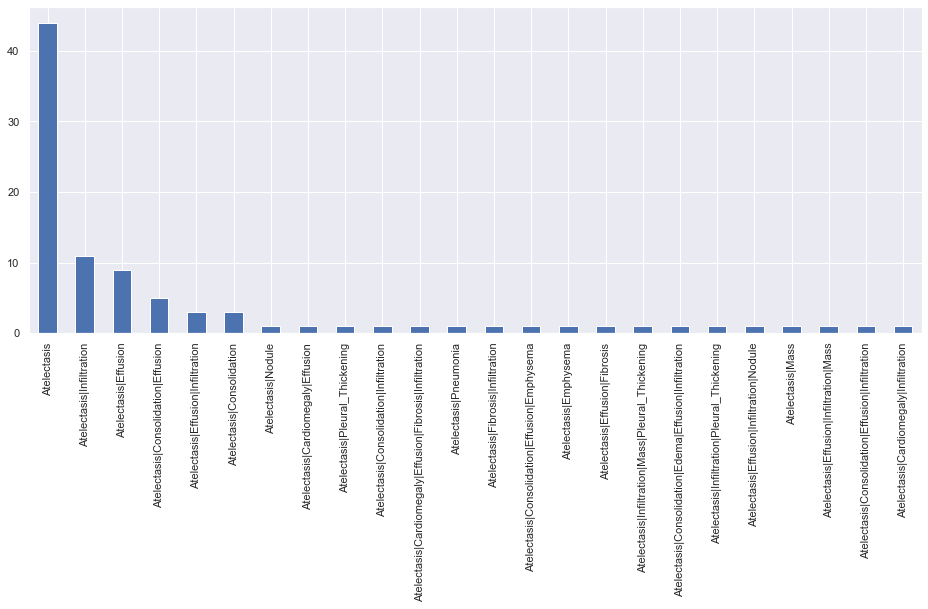

In [15]:
#Co-Occurance with (Atelectasis)
plt.figure(figsize=(16,6))
data[data.Atelectasis==1]['Finding Labels'].value_counts().plot(kind="bar")

## General Analysis 

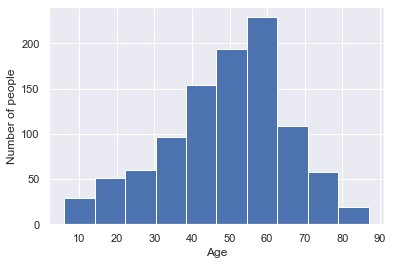

In [16]:
#Age Analysis
plt.hist(data['Patient Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.show() 


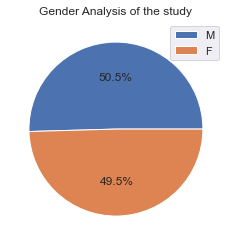

In [17]:
plt.pie(data['Patient Gender'].value_counts(), autopct='%1.1f%%')
plt.legend(data['Patient Gender'].unique())
plt.title('Gender Analysis of the study')
plt.show() 


### Age and Gender Analysis of some Diseases

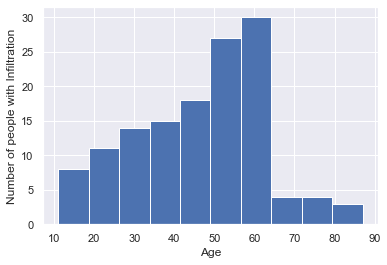

In [18]:
#Age Analysis of some Diseases
plt.hist(data[data.Infiltration==1]['Patient Age'])
plt.xlabel("Age")
plt.ylabel("Number of people with Infiltration")
plt.show()

In [19]:
data[data.Infiltration==1]['Patient Gender']

9      M
26     F
31     F
32     F
43     M
      ..
971    M
972    M
973    M
980    F
995    M
Name: Patient Gender, Length: 134, dtype: object

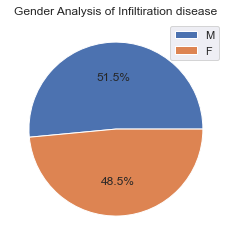

In [20]:
plt.pie(data[data.Infiltration==1]['Patient Gender'].value_counts(), autopct ='%1.1f%%' )
plt.legend(data['Patient Gender'].unique())
plt.title('Gender Analysis of Infiltiration disease')
plt.show() 


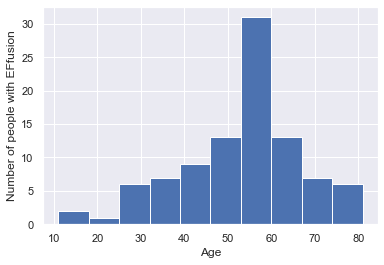

In [21]:
plt.hist(data[data.Effusion==1]['Patient Age'])
plt.xlabel("Age")
plt.ylabel("Number of people with EFfusion")
plt.show()

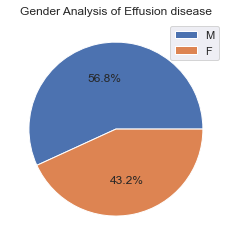

In [22]:
plt.pie(data[data.Effusion==1]['Patient Gender'].value_counts(), autopct ='%1.1f%%' )
plt.legend(data['Patient Gender'].unique())
plt.title('Gender Analysis of Effusion disease')
plt.show() 


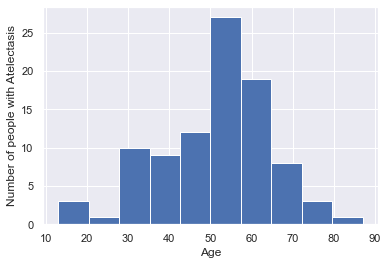

In [23]:
plt.hist(data[data.Atelectasis==1]['Patient Age'])
plt.xlabel("Age")
plt.ylabel("Number of people with Atelectasis")
plt.show()

### Finally, let's look at if and how age & gender relate to mass size in individuals who have a mass as a finding:


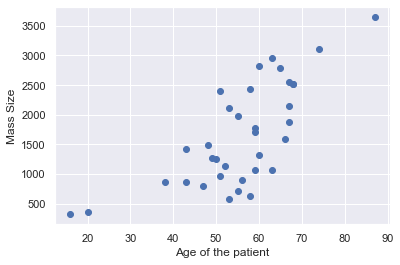

In [24]:
plt.scatter(data['Patient Age'],data['Mass_Size'])
plt.xlabel("Age of the patient")
plt.ylabel("Mass Size")
plt.show()

### The Average sizes for each gender

In [25]:
np.mean(data[data['Patient Gender']== 'M']['Mass_Size'])

1735.7

In [26]:
np.mean(data[data['Patient Gender']== 'F']['Mass_Size'])

1550.8